In [3]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab05.ok')

Assignment: lab05
OK, version v1.14.15



# Lab 5: Determine the step-size

This assignment is composed of 10 exercises. For each solved exercise, you get the points indicated below. You need to score at least **7 points** (out of 9) to pass the assignment.

## Instruction

 - Download a copy of this notebook from [Blackboard](https://esiee.blackboard.com/).
 
 
 - Run `jupyter notebook` on your computer, and open the `.ipynb` file that you just downloaded.


 - Solve the quizzes by filling in the cells with your solutions. 
 
 
 - Check your answer by running the unit test provided at the end of each quiz.
 
 
 - **Get your work checked before leaving the lab, otherwise you won't get any credit for it.**

## Grading

| Exercise | Topic | Points |
|----------|------|--------|
| Warm up | Gradient descent | 0 |
| Quiz 1.1 | Linear model | 1 |
| Quiz 1.2 | MSE cost | 1 |
| Quiz 1.3 | Linear regression | 1 |
| Quiz 2.1 | Tanh model | 1 |
| Quiz 2.2 | Tanh regression | 1 |
| Quiz 2.3 | ReLU model | 1 |
| Quiz 2.4 | ReLU regression | 1 |
| Quiz 3.1 | Lipschitz constant | 1 |
| Quiz 3.2 | Poly regression | 1 |

## Required packages

For this assignment, you need to import the following packages.
- [**Numpy**](www.numpy.org) - The library for scientific computing in Python.
- [**Matplotlib**](http://matplotlib.org) - The library for plotting graphs in Python.
- [**Autograd**](https://github.com/HIPS/autograd) - The library for automatic differentiation of Numpy code.

In [4]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Warm up

> **Complete the implementation of gradient descent with the following:**
>
> 1. Add the option for a diminishing stepsize, defined as:
>
> $$\alpha_k = \frac{\alpha_0}{1+k}$$
>
> 2. Implement the update step using the variable stepsize:
>
> $$ {\bf w} \leftarrow {\bf w} - \alpha_k \nabla J({\bf w}). $$

In [145]:
def gradient_descent(cost_fun, w_init, alpha, epochs, stepsize=None):
    """Find the point that minimizes the cost function.
    
    INPUTS:
    cost_fun -- Cost function | callable
    w_init   -- Initial point | numpy array
    alpha    -- step-size     | scalar
    epochs   -- n. iterations | integer
    
    OUTPUTS:
    w       -- final point
    history -- sequence of iterates w0, w1, ...
    """
    
    # automatic gradient
    from autograd import grad
    gradient = grad(cost_fun)

    # initialization
    w = np.array(w_init).copy()
    
    # gradient descent
    history = [w]   
    for k in range(epochs):
        
        # update the stepsize
        if stepsize == 'diminishing':
            ak = alpha/(1+k)
        else:
            ak = alpha
        
        # compute the next point
        w = w - ak*gradient(w) # YOUR CODE HERE
        
        # track the history
        history.append(w)
        
    return w.squeeze(), np.stack(history)

In [146]:
ok.grade("gradient_descent");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Part 1. Linear regression

The following quizzes will guide you through the solution of the optimization problem


$$
\operatorname*{minimize}_{\mathbf{w}\in\mathbb{R}^{N+1}}\; \frac{1}{P}\sum_{p=1}^{P}\Big(\textsf{linear-model}\left({\bf x}^{(p)}; \mathbf{w}\right) - y^{(p)} \Big)^2
$$

for a given set of input/output pairs $({\bf x}^{(1)},y^{(1)}), \dots, ({\bf x}^{(P)},y^{(P)})$.

### Quiz 1.1

> **Implement a function that evaluates the linear model on several input vectors $\mathbf{x}^{(p)} \in \mathbb{R}^N$, namely** 
>
> $$ 
\textsf{linear-model}\left({\bf x}^{(p)}; \mathbf{w} \right) = w_{0} + w_1 x_1^{(p)} + \dots + w_N x_N^{(p)} = \mathbf{w}^\top \mathring{\mathbf{x}}^{(p)}
$$
>
> **for a given vector $\mathbf{w}\in\mathbb{R}^{N+1}$.**

> *Hint:* The function `linear_model()` takes two inputs:
> - the weight vector $\mathbf{w}\in\mathbb{R}^{N+1}$
> - the matrix $X\in\mathbb{R}^{P\times N}$ stacking the vectors ${\bf x}^{(p)}\in \mathbb{R}^N$ along its rows:
>
>$$
X = \begin{bmatrix}
\_\!\_\; {{\bf x}^{(1)}}^\top \_\!\_ \\
\vdots \\
\_\!\_\; {{\bf x}^{(P)}}^\top \_\!\_ \\
\end{bmatrix}.
$$
>
> Consequently, the products ${\bf w}^\top\mathring{\mathbf{x}}^{(1)}, \dots, {\bf w}^\top\mathring{\mathbf{x}}^{(P)}$ can be efficiently computed via a matrix-vector multiplication:
>
>$$ 
\mathring{X} {\bf w} 
=
\begin{bmatrix}
{\mathring{\bf x}^{(1)}}^\top{\bf w}\\
\vdots\\
{\mathring{\bf x}^{(P)}}^\top {\bf w}
\end{bmatrix}.$$
>
> Note however that the shapes of input arrays `X` and `w` don't align for a matrix-vector product, as
> - `w` is a vector of shape `(N+1,)`
> - `X` is a matrix of shape `(P,N)`. 
>
> To circumvent this issue, you can proceed as follows:
> - multiply `X` with the sliced elements `w[1], ..., w[N]`
> - add `w[0]` to the result.

In [147]:
def linear_model(x, w):
    """
    INPUTS:
    x -- matrix of shape (P, N)
    w -- vector of shape (N+1,)

    OUTPUT:
    y -- vector of shape (P,)
    """
    
    # Compute 'w[0] + w[1] * x[p,0] + ... + w[N] * x[p,N-1]' for each row of 'x'
    y_hat = w[0] + np.sum(x*w[1:], axis=1)

    return y_hat

In [148]:
ok.grade("linear_model");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Quiz 1.2

> **Implement the following cost function:**
>
> $$ \big(\forall {\bf w}\in\mathbb{R}^{N+1}\big)\qquad J\left(\mathbf{w}\right) = \frac{1}{P}\sum_{p=1}^{P}\Big(\textsf{model}\left({\bf x}^{(p)}; \mathbf{w}\right) - y^{(p)} \Big)^2 $$
>
> **where the pairs $({\bf x}^{(p)},y^{(p)})$ are given.**

In [149]:
def mse_cost(w, x, y, model):
    """     µ
    Inputs:
    w -- model weights
    x -- model inputs
    y -- expected model outputs
    model -- function that evaluates a model on the inputs 'x' using the weights 'w'
    """
    # Evaluate the model on 'x' using the weights 'w'
    y_pred = model(x, w) # YOUR CODE HERE
    # Compute the mean squared error between 'y_hat' and 'y'
    J = np.mean((y_pred-y)**2) # YOUR CODE HERE
    
    return J

In [150]:
ok.grade("mse_cost");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Quiz 1.3

> **Use gradient descent to solve linear regression (i.e., to find the hyperplane that best fits the given points).** 
> - **Required:** The numerical error w.r.t. the exact solution must be less than $10^{-4}$.

> *Hint:* You simply need to invoke the function `gradient_descent(...)` with the following parameters.
> - `cost_fun` - **Cost function:** it's a Python callable defined by `def` or `lambda`.
> - `w_init` - **Initialization:** it's a list that contains `N+1` float values.
> - `alpha` - **Step-size:** it's a scalar value between $0$ and $1$. 
> - `epochs`  - **Number of iterations:** it's an integer value.

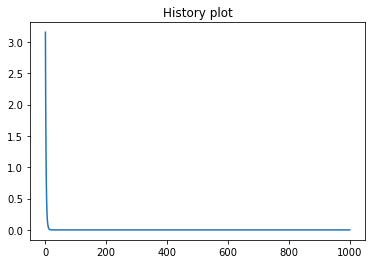

  Exact solution: [1, -1, -1]
Gradient descent: [ 1. -1. -1.]
 Numerical error: 8e-16


In [151]:
# Random-generated data
np.random.seed(42)
P = 50
N = 2
X = np.random.randn(P, N)
y = 1 - X[:,0] - X[:,1]

# Define the cost function on the given 'X' and 'y'
linear_mse_cost = lambda w: mse_cost(w, X, y, linear_model) # YOUR CODE HERE

# Set a random initialization
w_init = np.zeros(N+1) # YOUR CODE HERE

# Set the step-size
alpha = 0.1 # YOUR CODE HERE

# Set the number of iterations
epochs = 1000 # YOUR CODE HERE


# Perform the optimization by invoking 'gradient_descent()'
w, history = gradient_descent(linear_mse_cost,
                              w_init,
                              alpha,
                              epochs)


# Visualize the history plot
plt.plot([linear_mse_cost(wk) for wk in history])
plt.title('History plot')
plt.show()

# Compare with the exact solution
w_bar = [1, -1, -1]
print('  Exact solution:', w_bar)
print('Gradient descent:', w)
print(' Numerical error: {:.0e}'.format(np.linalg.norm(w - w_bar)))

In [152]:
ok.grade("linear_regression");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Part 2. Nonlinear regression

The following quizzes will guide you through the solution of the optimization problem

$$
\operatorname*{minimize}_{\mathbf{w}\in\mathbb{R}^{N+1}}\; \frac{1}{P}\sum_{p=1}^{P}\Big(\textsf{nonlinear-model}\left(x^{(p)}; \mathbf{w}\right) - y^{(p)} \Big)^2
$$

for a given set of input/output pairs $(x^{(1)},y^{(1)}), \dots, (x^{(P)},y^{(P)})$.

### Quiz 2.1

> **Implement a function that evaluates the hyperbolic tangent model on several input values $x^{(p)} \in \mathbb{R}$, namely** 
>
> $$ 
\textsf{tanh-model}\left(x^{(p)};\mathbf{w}\right) = w_{0} + w_1 \tanh\left(w_2 + w_3 x^{(p)}\right),
$$
>
> **for a given vector $\mathbf{w}=[w_0,w_1,w_2,w_3]\in\mathbb{R}^{4}$.**

> *Hint:* [`np.tanh()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.tanh.html)

In [153]:
def tanh_model(x, w):
    """
    Inputs:
    x -- vector of shape (P,)
    w -- vector of shape (4,)
    
    Returns:
    y -- vector of shape (P,)
    """

    z = w[0]+w[1]*np.tanh(w[2]+w[3]*x) # YOUR CODE HERE
    
    return z

In [154]:
ok.grade("tanh_model");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Quiz 2.2

> **Use gradient descent to solve the following optimization problem:** 
>
> $$ \operatorname*{minimize}_{\mathbf{w}\in\mathbb{R}^{4}}\; \frac{1}{P}\sum_{p=1}^{P}\Big(\textsf{tanh-model}\left(x^{(p)}; \mathbf{w}\right) - y^{(p)} \Big)^2, $$
>
> **where the pairs $(x^{(p)},y^{(p)})$ are given.**
>
> - **Required:** The cost function at the solution must be less than $0.09$.

> *Hint:* For this problem, gradient descent needs a high number of iteration to converge. Make sure that the history plot gets "perfectly" flat.

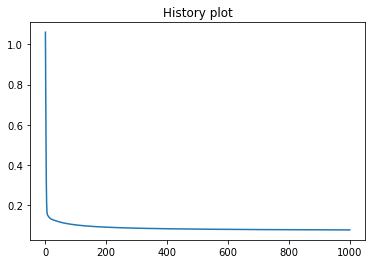

Solution found by gradient descent: [ 0.93674152 -1.06827229 -0.23666633  5.55339223]
Cost function at the solution: 0.0778227740127752


In [190]:
# Random-generated data
np.random.seed(42)
P = 50
X = np.linspace(-1,1,P)
y = 1 + np.tanh(-10*x + 0.5) + 0.3*np.random.randn(P)

# Define the cost function on the given data 'x' and 'y'
tanh_mse_cost = lambda w: mse_cost(w, X, y, tanh_model) # YOUR CODE HERE

# Set a random initialization
w_init = np.random.randn(4) # YOUR CODE HERE
#w_init[0] = 1;
# Set the step-size
alpha = 0.5 # YOUR CODE HERE

# Set the number of iterations
epochs = 1000# YOUR CODE HERE

# Perform the optimization by invoking 'gradient_descent()'
w, history = gradient_descent(tanh_mse_cost,
                              w_init,
                              alpha,
                              epochs)

# Visualize the history plot
plt.plot([tanh_mse_cost(wk) for wk in history])
plt.title('History plot')
plt.show()

# Compare with the exact solution
print('Solution found by gradient descent:', w)
print('Cost function at the solution:', tanh_mse_cost(w))

In [191]:
ok.grade("tanh_regression");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The next figure plots the **tanh model** (red line) using the weights estimated by gradient descent. You should observe quite a good fit to the data (blues dots).

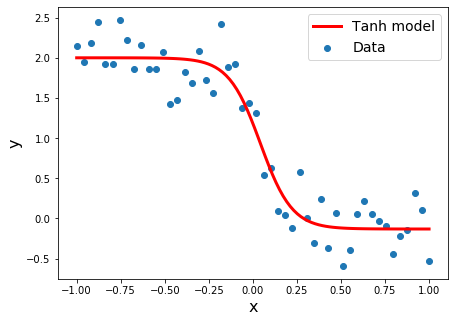

In [192]:
plt.figure(figsize=(7,5))

plt.scatter(x, y, label='Data')
plt.xlabel('x', fontsize='16')
plt.ylabel('y', fontsize='16')

t = np.linspace(-1,1,100)
plt.plot(t, tanh_model(t, w), color='r', linewidth=3, label='Tanh model')

plt.legend(fontsize='14')
plt.show()

### Quiz 2.3

> **Implement a function that evaluates the RELU model on several input values ${\bf x} \in \mathbb{R}^N$, namely** 
>
> $$ 
\textsf{relu-model}\left({\bf x};\mathbf{w}\right) = 
%w_0^{(0)} + w_1^{(0)} \max\{0, w_0^{(1)} + w_1^{(1)} x\} + \dots + w_B^{(0)} \max\{0, w_0^{(B)} + w_1^{(B)} x\},
w_0^{(0)} + w_1^{(0)} \max\big\{0, \mathring{\mathbf{x}}^\top \mathbf{w}^{(1)} \big\} + \dots + w_B^{(0)} \max\big\{0, \mathring{\mathbf{x}}^\top \mathbf{w}^{(B)} \big\},
$$
>
> **for a given set of parameters $\mathbf{w}=(\mathbf{w}^{(0)},\mathbf{w}^{(1)},\dots,\mathbf{w}^{(B)}) \in\mathbb{R}^{B+1}\times\mathbb{R}^{N+1}\times\dots\times\mathbb{R}^{N+1}$.**

> *Hints:* 
> - [`np.maximum()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.maximum.html)
> - You may find useful the function `linear_model()` implemented in a previous exercise.

In [194]:
def relu_model(x, w):
    """    
    Inputs:
    x -- matrix of shape (P, N)
    w -- vector of shape ((N+2)*B+1,)
    
    Outputs:
    y -- vector of shape (P,)
    """
    
    # Make sure that 'x' is a matrix
    x = x.reshape(x.shape[0], -1)
    
    # Dimensions
    N = x.shape[1]
    B = (w.size - 1) // (N+2)
    assert w.size == (N+2)*B+1
            
    # Select the first (N+1)*B weights and reshape them into a (N+1,B) matrix
    w_relu = w[:(N+1)*B].reshape(N+1, B) # YOUR CODE HERE
    
    # Multiply 'x' by 'w_relu' --> You may use 'linear_model()'
    z = linear_model(w_relu, x) # YOUR CODE HERE
    
    # Clip the negative values in 'z' to zero --> You may use 'np.maximum()'
    relu = np.maximim(z, 0) # YOUR CODE HERE
    
    # Select the last B+1 weights
    w_linear = w[len(w):] # YOUR CODE HERE
    
    # Multiply 'relu' by 'w_linear' --> You may use 'linear_model()'
    y = None # YOUR CODE HERE
     
    return y

In [ ]:
ok.grade("relu_model");

### Quiz 2.4

> **Use gradient descent to solve the following optimization problem:** 
>
> $$ \operatorname*{minimize}_{\mathbf{w}\in\mathbb{R}^{3B+1}}\; \frac{1}{P}\sum_{p=1}^{P}\Big(\textsf{relu-model}\left(x^{(p)}; \mathbf{w}\right) - y^{(p)} \Big)^2, $$
>
> **where the pairs $(x^{(p)},y^{(p)})$ are given.**
>
> - **Required:** The cost function at the solution must be less than $0.05$.

> *Hints:* 
> - For this problem, gradient descent needs a high number of iteration to converge. Make sure that the history plot gets "perfectly" flat.
> - The choice of the step-size $\alpha$ is critical for obtaining a satisfactory result. Try different values and select the one that leads to the smallest value of the cost function!

In [18]:
# Random-generated data
np.random.seed(42)
P = 50
x = np.linspace(-2,2,P)
y = np.sin(np.pi*x - np.pi) + 0.2*np.random.randn(P)

# Define the cost function on the given data 'x' and 'y'
relu_mse_cost = None # YOUR CODE HERE

# Set a random initialization
np.random.seed(5)
B = 100
w_init = None # YOUR CODE HERE

# Set the step-size
alpha = None # YOUR CODE HERE

# Set the number of iterations
epochs = None # YOUR CODE HERE

# Perform the optimization by invoking 'gradient_descent()'
... # YOUR CODE HERE

# Visualize the history plot
plt.plot([relu_mse_cost(wk) for wk in history])
plt.title('History plot')
plt.show()

# Compare with the exact solution
print('Cost function at the solution:', relu_mse_cost(w))

In [ ]:
ok.grade("relu_regression");

The next figure plots the **relu model** (red line) using the weights estimated by gradient descent. You should observe quite a good fit to the data (blues dots).

In [20]:
plt.figure(figsize=(7,5))

plt.scatter(x, y, label='Data')
plt.xlabel('x', fontsize='16')
plt.ylabel('y', fontsize='16')

t = np.linspace(-2.1,2.1,100)
plt.plot(t, relu_model(t, w), color='r', linewidth=3, label='Relu model')

plt.legend(fontsize='14')
plt.show()

## Part 3. Polynomial regression

The following quizzes will guide you through the solution of the optimization problem

$$
\operatorname*{minimize}_{\mathbf{w}\in\mathbb{R}^{N+1}}\; \frac{1}{P}\sum_{p=1}^{P}\Big(\textsf{poly-model}\left(x^{(p)}; \mathbf{w}\right) - y^{(p)} \Big)^2
$$

for a given set of input-output pairs $(x^{(1)},y^{(1)}), \dots, (x^{(P)},y^{(P)})$.

### Quiz 3.1

> **For a given matrix $X$, compute the Lipschitz constant of the function $J\left(\mathbf{w}\right) = \frac{1}{P} \| X\mathbf{w}-\mathbf{y} \|^2$, which is given as:**
>
> $$ L = \frac{2}{P} \| X^\top X \|_2. $$

> Hints:
> - $\|A\|_2$ denotes the maximum eigenvalue of the symmetric matrix $A$.
> - [`np.linalg.eigh()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.eigh.html)

In [21]:
# Random-generated data
np.random.seed(42)
P = 50
x = np.linspace(0,8,P)
y = 0.2*x**2 + 0.1*x + np.random.randn(P)

# Polynomial transformation
d = 2
X_poly = np.stack([x**i for i in range(d+1)], axis=1)

# Lipschitz constant
... # YOUR CODE HERE
L = None # YOUR CODE HERE

In [ ]:
ok.grade("lipschitz");

### Quiz 3.2

> **Use gradient descent to solve the following optimization problem:** 
>
> $$ \operatorname*{minimize}_{\mathbf{w}\in\mathbb{R}^{3}}\; \frac{1}{P} \| X\mathbf{w}-\mathbf{y} \|^2 $$
>
> **where $X\in\mathbb{R}^{P\times 3}$ and $y\in\mathbb{R}^{3}$ are given.**
>
> - **Required:** The cost function at the solution must be less than $1$.

> *Hints:* 
> - For this problem, gradient descent needs a high number of iteration to converge. Make sure that the history plot gets "perfectly" flat.
> - Use the Lipschitz constant $L$ to set the step-size as $\alpha = \frac{1}{L}$.

In [23]:
# Define the cost function on the given data 'X_poly' and 'y'
poly_mse_cost = None # YOUR CODE HERE

# Set a random initialization
np.random.seed(42)
w_init = None # YOUR CODE HERE

# Set the step-size
alpha = None # YOUR CODE HERE

# Set the number of iterations
epochs = None # YOUR CODE HERE

# Perform the optimization by invoking 'gradient_descent()'
... # YOUR CODE HERE

# Visualize the history plot
plt.plot([poly_mse_cost(wk) for wk in history])
plt.title('History plot')
plt.show()

# Compare with the exact solution
print('Cost function at the solution:', poly_mse_cost(w))

In [ ]:
ok.grade("poly_regression");

The next figure plots the **poly model** (red line) using the weights estimated by gradient descent. You should observe quite a good fit to the data (blues dots).

In [25]:
plt.figure(figsize=(7,5))

plt.scatter(x, y, label='Data')
plt.xlabel('x', fontsize='16')
plt.ylabel('y', fontsize='16')

t = np.linspace(-1,9,100)
X_test = np.stack([t**i for i in range(d+1)], axis=1)

plt.plot(t, X_test@w, color='r', linewidth=3, label='Poly model')

plt.legend(fontsize='14')
plt.show()